First, let's start with the dataset. I've randomly chosen ChocolateSales.csv because it seemed not so overwhelming and appropriate for the first attempts. You can download it right here https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales. It's free to use, so don't struggle :)

In the main.py you may find the final code, with the most important analysis and charts with no extra commands. So, feel free to explore.

 Let's start with importing the 'pandas' library:

In [55]:
import pandas as pd

Using pd as a shortcut for it as long as we are going to use it plenty of times.
So, our first task is to read a raw .csv file that we have downloaded:

In [56]:
data = pd.read_csv('./data/Chocolate Sales.csv')

Let's explore how our dataset looks like:

In [57]:
print(data.head())
print(data.info())
print(data.describe(include='all'))

     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null 

Deleting spaces from columns' names for a more comfortable usage:

In [58]:
print(data.columns)
data.columns = data.columns.str.replace(' ', '', regex=False) #regex=False is used to treat the ' ' literally
print(data.columns)

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')
Index(['SalesPerson', 'Country', 'Product', 'Date', 'Amount', 'BoxesShipped'], dtype='object')


Let's parse the 'Date' column to the appropriate datetime64 format:

In [59]:
print(data['Date'].head(5))
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
print(data['Date'].head(5))

0    04-Jan-22
1    01-Aug-22
2    07-Jul-22
3    27-Apr-22
4    24-Feb-22
Name: Date, dtype: object
0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]


Format used here is directly connected with the dates' format in the file. So, we adjust the parameter to correctly parse it to the needed one (datetime64).


Perfect! Preparations are finished! Let's get down to fetching some statistics!
Let's see the total number of boxes shipped:

In [60]:
print(f"Total number of shipped boxes: {data['BoxesShipped'].sum()}")

Total number of shipped boxes: 177007


Fetching the top sales person. We can use 'mode' function to get the list of the most common values in the specified column. Then we take the value with index '0' (which is the most frequent name appearing):

In [61]:
print(f"Top sales person: {data['SalesPerson'].mode()[0]}")

Top sales person: Kelci Walkden


Let's see the top 5 chocolate brands by the sales amount. We can do that by using the 'values_count()' function in order to count sales for different products. Then 'head(5)' to get the first 5 from the list. '.to_string(index=True, header=False)' lets us show the values (Brand names and sales times), but disable the column name (Products).

In [62]:
print(f"Top 5 products: \n{data['Product'].value_counts().head(5).to_string(index=True, header=False)}")

Top 5 products: 
Eclairs               60
50% Dark Bites        60
Smooth Sliky Salty    59
White Choc            58
Drinking Coco         56


And now let's fetch the most profitable month and the earnings for that period. But first we need some extra preparations.
We need to:
1 - Adjust the "Amount" column by parsing it to casual float
2 - Add a "Month" column for better readability
3 - Get the most profitable month
4 - Get the exact total profit during this month

In [64]:
# Ensure 'Amount' column is numeric (in case of any non-numeric values)
data['Amount'] = data['Amount'].replace({'\\$': ''}, regex=True)  # Remove the dollar sign
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Extract the month and year to a new column
data['Month'] = data['Date'].dt.to_period('M')

# Group by Month and calculate the total profit (Amount) per month
monthly_profit = data.groupby('Month')['Amount'].sum()

# Find the most profitable month (keep as Period)
most_profitable_month = monthly_profit.idxmax()

# Get the total profit for the best month
total_best_month_profit = monthly_profit.loc[most_profitable_month]

# Format for display
formatted_month = most_profitable_month.strftime('%B %Y')

print(f"Most profitable month: {formatted_month} - Total profit: {total_best_month_profit}")

Most profitable month: June 2022 - Total profit: 10962.0


Perfect! Now we can move on to construct some basic charts for the data visualisation. We need to import one more library to accomplish that.

In [65]:
import matplotlib.pyplot as plt

Alright, let's start with a histogram to depict the sales distribution:

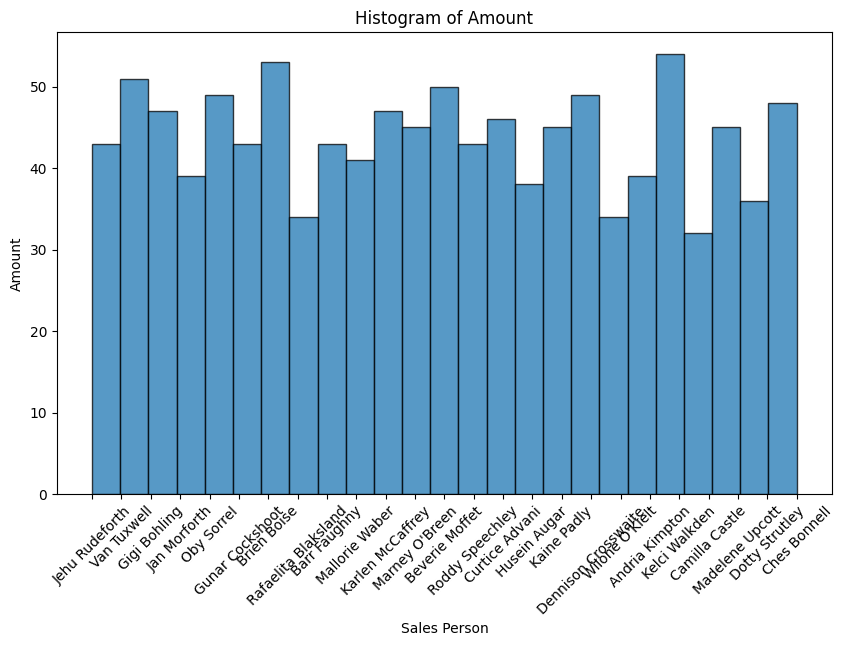

In [81]:
plt.figure(figsize = (10,6))
plt.hist(data['SalesPerson'], bins = 25, edgecolor = 'black', alpha = 0.75)
plt.xlabel('Sales Person')
plt.ylabel('Amount')
plt.xticks(rotation = 45)
plt.title('Histogram of Amount')
plt.show()